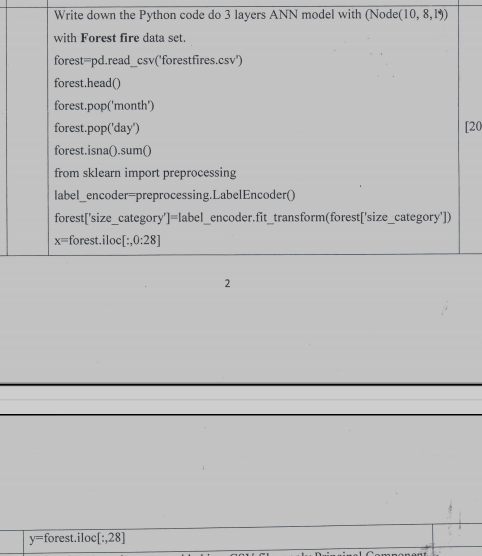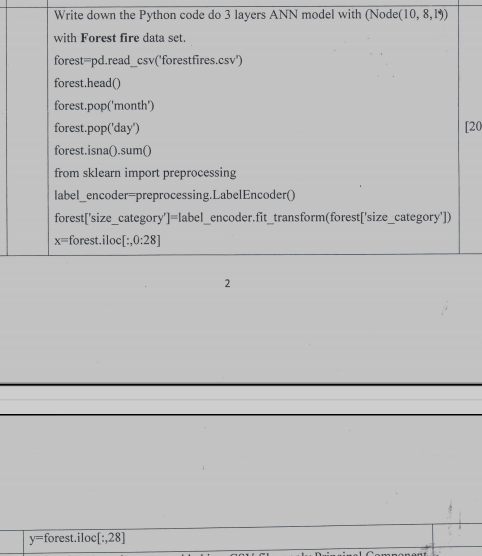

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder


In [2]:
forest=pd.read_csv(r'C:\Users\krish\Downloads\forestfires.csv')
forest

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [3]:
forest.pop('month')

0      mar
1      oct
2      oct
3      mar
4      mar
      ... 
512    aug
513    aug
514    aug
515    aug
516    nov
Name: month, Length: 517, dtype: object

In [4]:
forest.pop('day')

0      fri
1      tue
2      sat
3      fri
4      sun
      ... 
512    sun
513    sun
514    sun
515    sat
516    tue
Name: day, Length: 517, dtype: object

In [5]:
forest.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
forest.isna().sum()

X       0
Y       0
FFMC    0
DMC     0
DC      0
ISI     0
temp    0
RH      0
wind    0
rain    0
area    0
dtype: int64

In [7]:
#this is not part of the question just making it accurate to the questions dataset
forest['size_category'] = np.where(forest['area']>6, '1', '0')
forest['size_category']= pd.to_numeric(forest['size_category'])
forest.tail(10)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
507,2,4,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,0
508,1,2,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,0
509,5,4,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,0
510,6,5,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43,0
511,8,6,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00,0
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0
516,6,3,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0


In [8]:
forest.shape

(517, 12)

In [9]:
forest.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'size_category'],
      dtype='object')

In [10]:
y = forest['size_category']
X = forest.drop(['size_category'], axis=1)


In [11]:
X

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: int64

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [14]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [15]:
#building ann
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()

#layer1
model.add(Dense(10,activation='relu',input_shape=(X_train.shape[1],)))

#layer2
model.add(Dense(8,activation='relu'))

#output
model.add(Dense(1,activation='sigmoid'))#(binary classification)

C:\Users\krish\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
history=model.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.2)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8170 - loss: 0.4275 - val_accuracy: 0.8313 - val_loss: 0.4483
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8227 - loss: 0.4206 - val_accuracy: 0.8313 - val_loss: 0.4439
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8046 - loss: 0.4363 - val_accuracy: 0.8313 - val_loss: 0.4391
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8292 - loss: 0.4047 - val_accuracy: 0.8313 - val_loss: 0.4347
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8166 - loss: 0.4029 - val_accuracy: 0.8434 - val_loss: 0.4306
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7880 - loss: 0.4415 - val_accuracy: 0.8313 - val_loss: 0.4268
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7927 - loss: 0.4382 - val_accuracy: 0.8434 - val_loss: 0.4227
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8074 - loss: 0.4278 - val_accuracy: 0.

In [56]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print('test accuracy',accuracy)

test accuracy 0.9230769276618958


In [55]:
#optional
y_pred=model.predict(X_test)
y_pred_classes=(y_pred>0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [57]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))


[[72  2]
 [ 6 24]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        74
           1       0.92      0.80      0.86        30

    accuracy                           0.92       104
   macro avg       0.92      0.89      0.90       104
weighted avg       0.92      0.92      0.92       104



#new question same paper <br>
np.random.seed(2) ## same for weights

X = np.random.randn(6, 30)

Y = (np.random.randn(1, 30)>0)

Define a function to create an ANN for the dataset given above. Write the

python code in your answer sheet.

In [16]:
np.random.seed(2)

In [64]:
X = np.random.randn(6, 30)

Y = (np.random.randn(1, 30)>0)

In [59]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

✔ X shape = (number of samples, number of features)
✔ y shape = (number of samples, 1)

Means:

6 rows

30 columns

So:

6 features  
30 samples  


But the matrix is arranged like:

shape = (6, 30)


❌ WRONG for Keras.
Keras wants (30, 6).

In [84]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Given in the question
np.random.seed(2)                     # to keep weights same every run
X = np.random.randn(6, 30)            # 6 features, 30 samples
Y = (np.random.randn(1, 30) > 0)      # binary labels (True/False)

# ---------- Function to create ANN ----------
def create_ann():
    model = Sequential()

    # Input layer (6 neurons = 6 features)
    model.add(Dense(8, activation='relu', input_shape=(6,)))

    # Hidden layer
    model.add(Dense(4, activation='relu'))

    # Output layer (binary classification)
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model



# # Evaluate (optional)
# loss, acc = model.evaluate(X.T, Y.T, verbose=0)
# print("Accuracy:", acc)


Accuracy: 0.7666666507720947


In [88]:
# Create and train ANN
model = create_ann()


In [93]:
history = model.fit( X.T, Y.T,epochs=50,batch_size=5,validation_split=0.2,verbose=1)# 30 samples → transpose required

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7444 - loss: 0.4337 - val_accuracy: 0.8333 - val_loss: 0.8251
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7806 - loss: 0.4188 - val_accuracy: 0.8333 - val_loss: 0.8277
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7944 - loss: 0.4002 - val_accuracy: 0.8333 - val_loss: 0.8294
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7528 - loss: 0.3903 - val_accuracy: 0.8333 - val_loss: 0.8353
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7944 - loss: 0.3779 - val_accuracy: 0.8333 - val_loss: 0.8440
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8833 - loss: 0.3482 - val_accuracy: 0.8333 - val_loss: 0.8505
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8750 - loss: 0.3412 - val_accuracy: 0.8333 - val_loss: 0.8548
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8222 - loss: 0.3957 - val_accuracy: 0.8333 - val_loss: 0.8564


In [92]:
#this question is not accurate or dataset not provided

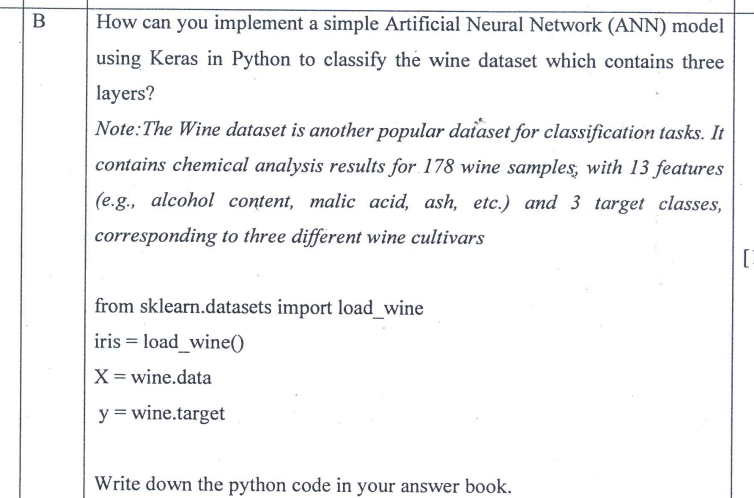

In [41]:
from sklearn.datasets import load_wine

iris = load_wine()
X = iris.data
y = iris.target


In [42]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]], shape=(178, 13))

In [43]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [46]:
print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [48]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

You use Softmax
more than 2 classes

classes are mutually exclusive

one sample belongs to exactly ONE class

Examples:

0 / 1 / 2 wine types

digit classification (0–9)

dog vs cat vs horse

sentiment: positive / negative / neutral

🔥 If number of classes ≥ 3 → softmax is required.

In [49]:
# when we do softmax we have to do onehotencoder

In [50]:
from tensorflow.keras.utils import to_categorical

# completely reset it
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat  = to_categorical(y_test,  num_classes=3)

print(y_train_cat.shape)
print(y_test_cat.shape)


(142, 3)
(36, 3)


In [51]:
print(y_train_cat.shape)   # should be (142, 3)
print(y_test_cat.shape)    # should be (36, 3)


(142, 3)
(36, 3)


hidden layers = input layers +output layers /2

or 

(input+hidden layer 1 )-input layer

Layer 2 (second hidden) – 16 → 8 neurons

In [59]:
#ann
model = Sequential()
# model.add(Dense(8,activation='relu',input_shape=(13,)))
model.add(Dense(4,activation='relu',input_shape=(13,)))
model.add(Dense(3,activation='softmax'))

In [60]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [63]:
history=model.fit(X_train,y_train_cat,epochs=50,batch_size=8,validation_split=0.2,verbose=1)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9735 - loss: 0.1827 - val_accuracy: 0.8621 - val_loss: 0.3286
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9735 - loss: 0.1750 - val_accuracy: 0.8621 - val_loss: 0.3240
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9735 - loss: 0.1679 - val_accuracy: 0.8966 - val_loss: 0.3196
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9735 - loss: 0.1607 - val_accuracy: 0.8966 - val_loss: 0.3149
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9735 - loss: 0.1544 - val_accuracy: 0.8966 - val_loss: 0.3106
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9735 - loss: 0.1482 - val_accuracy: 0.9310 - val_loss: 0.3066
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9735 - loss: 0.1425 - val_accuracy: 0.9310 - val_loss: 0.3023
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9735 - loss: 0.1371 - val_accuracy: 0.9310 - v

In [64]:
#correct answer !!!

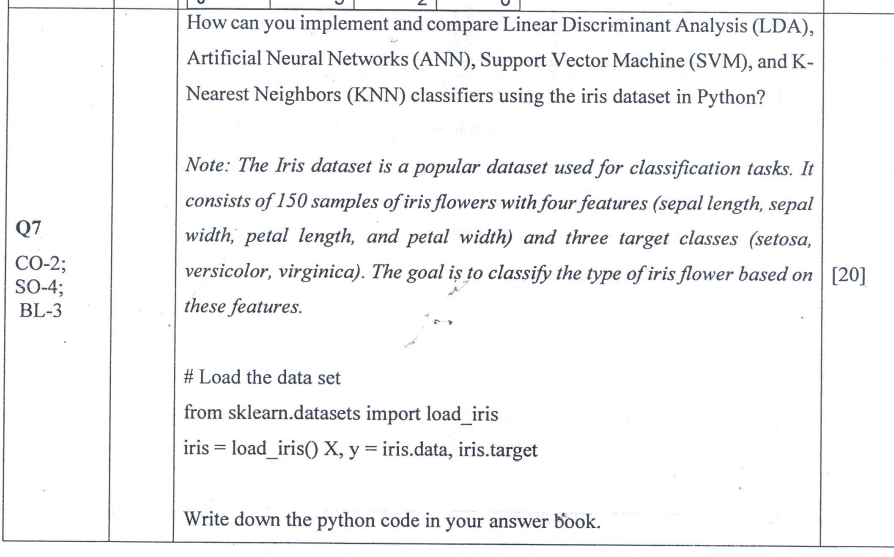

# we are only going to do ann not everything here

In [106]:
from sklearn.datasets import load_iris
iris=load_iris()
X,y=iris.data,iris.target

In [107]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [108]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [109]:
X.shape #over here 150 is samples and 4 is the features so 4 is the input shpae

(150, 4)

In [110]:
y.shape

(150,)

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [113]:
from tensorflow.keras.utils import to_categorical

In [114]:
y_train_cat=to_categorical(y_train,num_classes=3)
y_test_cat=to_categorical(y_test,num_classes=3)

In [115]:
print(y_train_cat.shape)
print(y_test_cat.shape)


(120, 3)
(30, 3)


In [116]:
model=Sequential()
model.add(Dense(8,activation='relu',input_shape=(4,)))
model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='softmax'))

C:\Users\krish\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [117]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [119]:
history=model.fit(X_train,y_train_cat,epochs=70,batch_size=8,validation_split=0.2,verbose=1)

Epoch 1/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6771 - loss: 0.7645 - val_accuracy: 0.6250 - val_loss: 0.8603
Epoch 2/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6771 - loss: 0.7466 - val_accuracy: 0.6250 - val_loss: 0.8480
Epoch 3/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6771 - loss: 0.7314 - val_accuracy: 0.6250 - val_loss: 0.8379
Epoch 4/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6771 - loss: 0.7199 - val_accuracy: 0.6250 - val_loss: 0.8288
Epoch 5/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6771 - loss: 0.7099 - val_accuracy: 0.6250 - val_loss: 0.8202
Epoch 6/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6771 - loss: 0.7000 - val_accuracy: 0.6250 - val_loss: 0.8123
Epoch 7/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6771 - loss: 0.6902 - val_accuracy: 0.6250 - val_loss: 0.8039
Epoch 8/70
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6875 - loss: 0.6809 - val_accuracy: 0.6250 - v

In [120]:
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print("Test Accuracy:", accuracy)
print("Test Loss:", loss)


Test Accuracy: 0.8999999761581421
Test Loss: 0.18616601824760437


In [121]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test_cat.argmax(axis=1)

print("Predicted:", y_pred_classes[:10])
print("Actual:   ", y_true[:10])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Predicted: [2 2 2 1 0 2 2 0 0 1]
Actual:    [1 2 2 1 0 2 1 0 0 1]


from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes))


#Question paper <br> 
np.random.seed(5) ## same for weights <br>
X= np.random.randn(5, 25)<br>
Y = (np.random.randn(1, 25)>0)<br>
Define a function to create an ANN for the dataset given above.<br>
Write the python code for ANN model in your answer sheet.
 -->

In [132]:
import numpy as np
import pandas as pd
np.random.seed(5)
X=np.random.randn(5,25)
Y=(np.random.randn(1,25)>0)

In [133]:
X

array([[ 0.44122749, -0.33087015,  2.43077119, -0.25209213,  0.10960984,
         1.58248112, -0.9092324 , -0.59163666,  0.18760323, -0.32986996,
        -1.19276461, -0.20487651, -0.35882895,  0.6034716 , -1.66478853,
        -0.70017904,  1.15139101,  1.85733101, -1.51117956,  0.64484751,
        -0.98060789, -0.85685315, -0.87187918, -0.42250793,  0.99643983],
       [ 0.71242127,  0.05914424, -0.36331088,  0.00328884, -0.10593044,
         0.79305332, -0.63157163, -0.00619491, -0.10106761, -0.05230815,
         0.24921766,  0.19766009,  1.33484857, -0.08687561,  1.56153229,
        -0.30585302, -0.47773142,  0.10073819,  0.35543847,  0.26961241,
         1.29196338,  1.13934298,  0.4944404 , -0.33633626, -0.10061435],
       [ 1.41339802,  0.22125412, -1.31077313, -0.68956523, -0.57751323,
         1.15220477, -0.10716398,  2.26010677,  0.65661947,  0.12480683,
        -0.43570392,  0.97217931, -0.24071114, -0.82412345,  0.56813272,
         0.01275832,  1.18906073, -0.07359332, -2

In [137]:
X.shape

(5, 25)

In [138]:
Y

array([[False, False, False, False,  True, False, False, False, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
        False, False,  True, False, False, False, False]])

In [139]:
Y.shape

(1, 25)

The shapes of x and y arent same so did x.shape to overcome it do .T 

In [141]:
X=np.random.randn(5,25).T
Y=(np.random.randn(1,25)>0).T

In [143]:
X.shape

(25, 5)

In [145]:
Y.shape

(25, 1)

In [146]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [147]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

In [153]:
def create_model():
    model=Sequential()
    model.add(Dense(16,activation='relu',input_shape=(5,)))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

model=create_model()
history=model.fit(X_train,y_train,epochs=100,batch_size=8,verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4500 - loss: 0.6782
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4500 - loss: 0.6726
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5000 - loss: 0.6685
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5500 - loss: 0.6644
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5500 - loss: 0.6604
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5500 - loss: 0.6568
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5500 - loss: 0.6531
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5500 - loss: 0.6503 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5500 - loss: 0.6471
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5500 - loss: 0.6444
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6000 - loss: 0.6411
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6500 - l

In [154]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test_cat.argmax(axis=1)

print("Predicted:", y_pred_classes[:10])
print("Actual:   ", y_true[:10])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Predicted: [0 0 0 0 0]
Actual:    [1 2 2 1 0 2 1 0 0 1]
